# SLEEP DISORDER PREDICTION


#### Features

* Person ID: An identifier for each individual.

* Gender: The gender of the person (Male/Female).

* Age: The age of the person in years.

* Occupation: The occupation or profession of the person.

* Sleep Duration (hours): The number of hours the person sleeps per day.

* Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

* Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

* Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

* BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

* Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

* Heart Rate (bpm): The resting heart rate of the person in beats per minute.

* Daily Steps: The number of steps the person takes per day.

* Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

## Importing Libs and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Splitting Data

In [3]:
# Spliting data before transformations

x = df.drop(columns = ['Person ID','Sleep Disorder'])
y = df['Sleep Disorder'].fillna('None')
np.random.seed(123)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25)

# Exploring Data

In [4]:
# Verifying info of dataframe
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 12 to 365
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   280 non-null    object 
 1   Age                      280 non-null    int64  
 2   Occupation               280 non-null    object 
 3   Sleep Duration           280 non-null    float64
 4   Quality of Sleep         280 non-null    int64  
 5   Physical Activity Level  280 non-null    int64  
 6   Stress Level             280 non-null    int64  
 7   BMI Category             280 non-null    object 
 8   Blood Pressure           280 non-null    object 
 9   Heart Rate               280 non-null    int64  
 10  Daily Steps              280 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 26.2+ KB


In [5]:
xtrain.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,42.203571,7.146071,7.342857,58.832143,5.332143,70.146429,6793.214286
std,8.710270,0.788119,1.213847,20.550585,1.774077,4.251500,1623.105024
min,28.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.750000,6.500000,6.000000,45.000000,4.000000,68.000000,5425.000000
50%,42.000000,7.200000,8.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


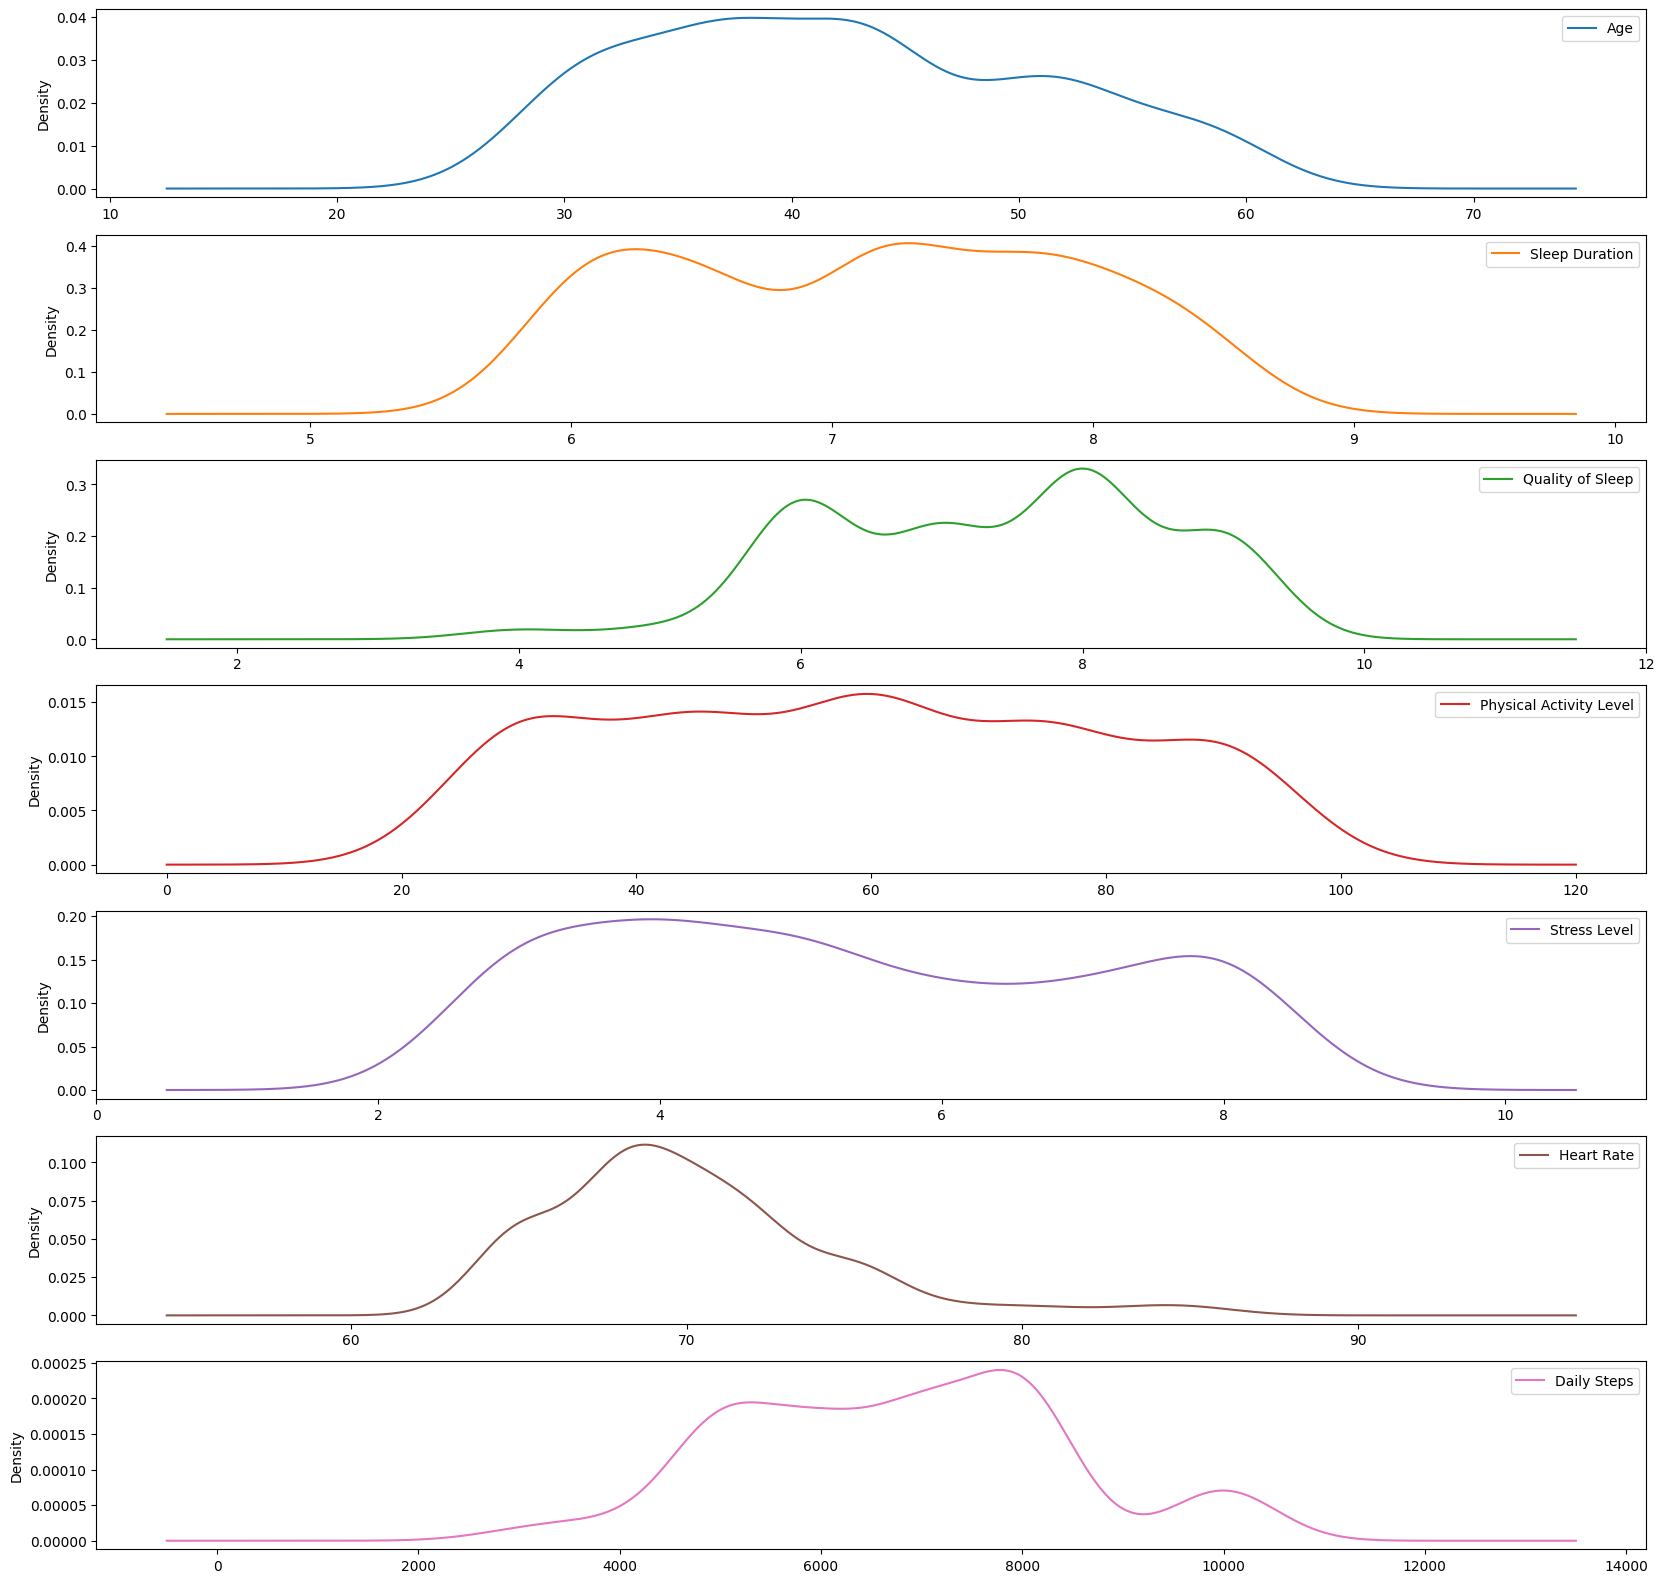

In [6]:
ax = xtrain.plot(kind = 'kde', subplots = True, sharex = False, sharey = False, figsize = (20,20))

In [7]:
# Verifing how many unique values dataset 
xtrain.nunique()

Gender                      2
Age                        30
Occupation                 10
Sleep Duration             27
Quality of Sleep            6
Physical Activity Level    16
Stress Level                6
BMI Category                4
Blood Pressure             25
Heart Rate                 18
Daily Steps                20
dtype: int64

In [8]:
xtrain.apply(lambda x: x.unique())

Gender                                                        [Male, Female]
Age                        [29, 48, 39, 32, 30, 50, 43, 41, 53, 35, 52, 3...
Occupation                 [Doctor, Engineer, Nurse, Lawyer, Accountant, ...
Sleep Duration             [6.1, 7.3, 6.5, 6.0, 6.4, 7.7, 7.8, 7.6, 8.5, ...
Quality of Sleep                                          [6, 7, 5, 8, 9, 4]
Physical Activity Level    [30, 65, 40, 35, 90, 75, 60, 45, 50, 32, 70, 5...
Stress Level                                              [8, 5, 7, 6, 3, 4]
BMI Category                      [Normal, Obese, Overweight, Normal Weight]
Blood Pressure             [120/80, 142/92, 132/87, 125/80, 130/86, 140/9...
Heart Rate                 [70, 83, 80, 72, 78, 75, 65, 84, 68, 74, 85, 8...
Daily Steps                [8000, 3500, 4000, 5000, 4100, 10000, 3300, 60...
dtype: object

In [9]:
# In the previous step wee see that BMI variable has levels and we need to transform it.
xtrain.select_dtypes('object')['BMI Category'].unique()

array(['Normal', 'Obese', 'Overweight', 'Normal Weight'], dtype=object)

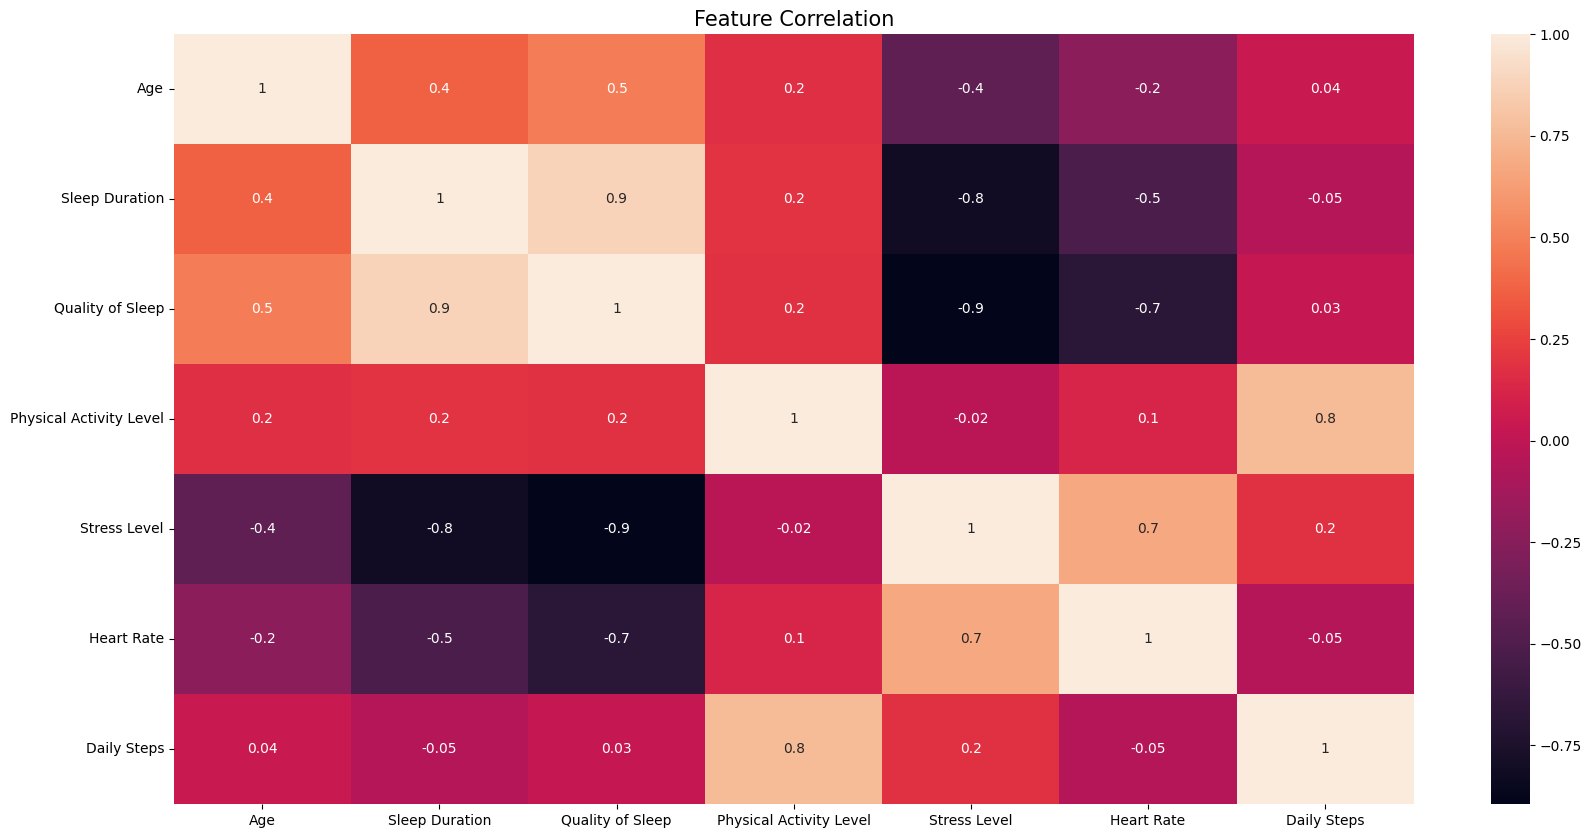

In [10]:
# Let's Evaluate correlation between features
plt.figure(figsize = (20,10))
ax = sns.heatmap(xtrain.corr(numeric_only=True), annot = True, fmt= '.1g')
ax.set_title('Feature Correlation', fontdict = {'size':15})
plt.show()

#### Here we can see that Quality of Sleep and Sleep Duration are highly correlated as well as Physical Activity Level and Daily Steps. We could remove one of them. However Sleep duration does not mean Quality of sleep and Daily Steps not completely explain Physical Activity level

#### Observations:

* Age and Blood Pressure have a positive correlation: As Age increases Blood Pressure also increases
* Stress Level and Sleep duration are negatively correlated. When people sleep more they reduce their stress level.
* Stress Level and Heart rate are positively correlated, because Stress increases heart rate.
* People with high BMI tend to have higher Blood Pressure.



## Creating functions for Feature Engineering inside Pipeline

In [11]:
# Function to transform columns
def columns_transformer(data):
    bmi_levels = {'Normal':1, 'Obese':3, 'Overweight':2, 'Normal Weight':1}
    data['BMI Category'] = data['BMI Category'].replace(bmi_levels)
    data[['Blood Pressure fn','Blood Pressure ln']] = data['Blood Pressure'].str.split("/", expand = True)
    data['Blood Pressure fn'] = data['Blood Pressure fn'].astype('int64')
    data['Blood Pressure ln'] = data['Blood Pressure ln'].astype('int64')
    data = data.drop(columns = ['Blood Pressure'])
    return data.select_dtypes(include = 'object')

## Creating Pipelines for Numerical and Categorical Features

In [12]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.svm import LinearSVC as SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

categorical_transformer = Pipeline(steps = [
    ('col_transf', FunctionTransformer(columns_transformer)),
    ('one_hot', OneHotEncoder(sparse_output = False, handle_unknown= 'ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('knn_imputer', KNNImputer()),
    ('scaler', StandardScaler())
])

## Separating Categorical and Numerical Columns

In [13]:
# Getting numerical and categorical column names
cat_cols = xtrain.select_dtypes(include = 'object').columns
num_cols = xtrain.select_dtypes(exclude = 'object').columns

## Creating Preprocessing Pipeline

In [14]:
# Setting the PReprocessing Pipeline
prep_pipe = ColumnTransformer(transformers = [
    ('cat_transf', categorical_transformer, cat_cols),
    ('num_transf', numerical_transformer, num_cols)
])

## Setting Parameters Grid for tunning

In [15]:
# Setting Parameter Grid for Tuning
param_grid_gbc = {
    'gbc__n_estimators':[100,300,500],
    'gbc__learning_rate':[0.001, 0.01, 0.1, 1],
    'gbc__max_depth':[1, 3, 5, 7],
    'gbc__random_state':[123]
}

param_grid_svc = {
    'svc__C':[0.001, 0.01, 0.1, 1],
    'svc__tol':[0.001, 0.01, 0.1],
    'svc__random_state':[123]
}



## Creating Complete Pipelines

In [16]:
final_pipeline_gbc = Pipeline(steps=[
    ('preprocess',prep_pipe),
    ('gbc', GBC())
])

final_pipeline_svc = Pipeline(steps=[
    ('preprocess',prep_pipe),
    ('svc', SVC())
])

grid_search_gbc = GridSearchCV(final_pipeline_gbc, param_grid_gbc, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svc = GridSearchCV(final_pipeline_svc, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_gbc.fit(xtrain, ytrain)
grid_search_svc.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_transf',
                                                                         Pipeline(steps=[('col_transf',
                                                                                          FunctionTransformer(func=<function columns_transformer at 0x7c1791c9f2e0>)),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure'], dtype='obj...
                                                                         Pipeline(steps=[('knn_imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object'))])),
                                       ('svc', LinearSVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1],
                         'svc__random_state': [123],
                         'svc__tol': [0.001, 0.01, 0.1]},
             scoring='accuracy')

## Evaluating Models

In [17]:
# Let's Compare the best Accuracy for this models
print(f'We had {grid_search_gbc.best_score_ * 100 :.2f}% accuracy for Gradient Boost Classifier vs {grid_search_svc.best_score_* 100 :.2f}% for Suport Vector Machine')

We had 90.36% accuracy for Gradient Boost Classifier vs 90.00% for Suport Vector Machine


## Ploting Feature Importances

In [18]:
# Getting names from features and GBC importances to plot
importances_gbc = grid_search_gbc.best_estimator_[1].feature_importances_
pipe = prep_pipe.fit(xtrain)
num_names = pipe.named_transformers_['num_transf'][0].get_feature_names_out()
names = pipe.named_transformers_['cat_transf'][1].get_feature_names_out()
all_names = np.concatenate((num_names, names))

In [19]:
# Creating a Data Frame to sort it
importances_data = pd.DataFrame(importances_gbc, all_names, columns = ['Importances']).sort_values(by = 'Importances', ascending=False)
importances_data

,Importances
Daily Steps,0.297672
Occupation_Lawyer,0.206272
Occupation_Nurse,0.183220
Occupation_Software Engineer,0.134732
Gender_Male,0.051512
Occupation_Engineer,0.042404
Occupation_Salesperson,0.029726
Occupation_Teacher,0.020127
Stress Level,0.017732
Occupation_Sales Representative,0.006440


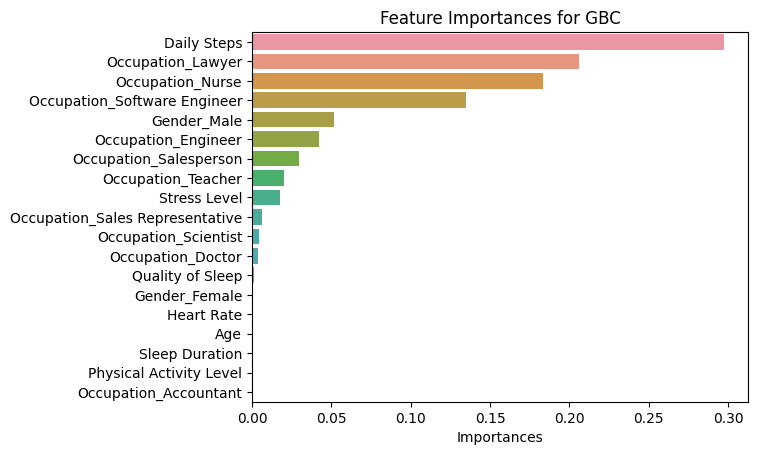

In [20]:
# Feature importances plot sorted
ax = sns.barplot(data = importances_data , y = importances_data.index, x = 'Importances', orient='h')
ax.set_title('Feature Importances for GBC')
plt.show()

In [21]:
# Getting names from features and SVC importances to plot
importances_svc = grid_search_svc.best_estimator_[1].coef_[0]
pipe = prep_pipe.fit(xtrain)
num_names = pipe.named_transformers_['num_transf'][0].get_feature_names_out()
names = pipe.named_transformers_['cat_transf'][1].get_feature_names_out()
all_names = np.concatenate((num_names, names))

In [22]:
# Creating a Data Frame to sort it
importances_data = pd.DataFrame(importances_svc, all_names, columns = ['Importances']).sort_values(by = 'Importances', ascending=False)
importances_data

,Importances
Occupation_Lawyer,0.770444
Occupation_Doctor,0.612500
Quality of Sleep,0.511211
Occupation_Engineer,0.482012
Gender_Male,0.409352
Occupation_Salesperson,0.249465
Heart Rate,0.228526
Stress Level,0.001531
Sleep Duration,-0.005777
Occupation_Software Engineer,-0.141748


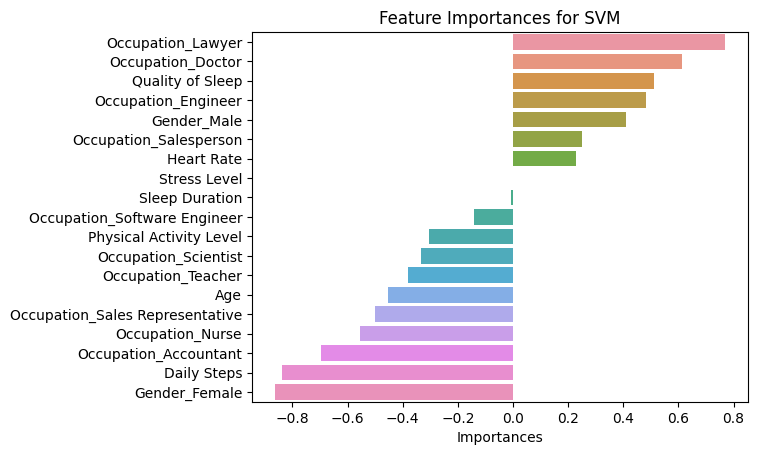

In [23]:
# Feature importances plot sorted
ax = sns.barplot(data = importances_data , y = importances_data.index, x = 'Importances', orient='h')
ax.set_title('Feature Importances for SVM')
plt.show()

## Training Gradient Boosting Classifier Reducing Components with PCA

In [24]:
# implementing PCA to see if accuracy get high
categorical_transformer = Pipeline(steps = [
    ('col_transf', FunctionTransformer(columns_transformer)),
    ('one_hot', OneHotEncoder(sparse_output = False, handle_unknown= 'ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('knn_imputer', KNNImputer()),
    ('scaler', StandardScaler())
])

# Setting Preprocessing Pipeline

prep_pipe = ColumnTransformer(transformers = [
    ('cat_transf', categorical_transformer, cat_cols),
    ('num_transf', numerical_transformer, num_cols),
])

# Setting Parameter Grid for Tuning

param_grid_gbc = {
    'gbc__n_estimators':[100,300,500],
    'gbc__learning_rate':[0.001, 0.01, 0.1, 1],
    'gbc__max_depth':[1, 3, 5, 7],
    'gbc__random_state':[123]
}

final_pipeline_gbc = Pipeline(steps=[
    ('preprocess',prep_pipe),
    ('pca', PCA(n_components= 4)),
    ('gbc', GBC())
])


grid_search_gbc = GridSearchCV(final_pipeline_gbc, param_grid_gbc, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_gbc.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_transf',
                                                                         Pipeline(steps=[('col_transf',
                                                                                          FunctionTransformer(func=<function columns_transformer at 0x7c1791c9f2e0>)),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure'], dtype='obj...
                                                                         Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object'))])),
                                       ('pca', PCA(n_components=4)),
                                       ('gbc', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gbc__learning_rate': [0.001, 0.01, 0.1, 1],
                         'gbc__max_depth': [1, 3, 5, 7],
                         'gbc__n_estimators': [100, 300, 500],
                         'gbc__random_state': [123]},
             scoring='accuracy')

In [25]:
print(f'Applying PCA before fitting GBC got {grid_search_gbc.best_score_ * 100 :.2f}% accuracy, so it did not improve')

Applying PCA before fitting GBC got 88.57% accuracy, so it did not improve


In [26]:
# implementing PCA to see if accuracy get high
categorical_transformer = Pipeline(steps = [
    ('col_transf', FunctionTransformer(columns_transformer)),
    ('one_hot', OneHotEncoder(sparse_output = False, handle_unknown= 'ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('knn_imputer', KNNImputer()),
    ('scaler', StandardScaler())
])

# Setting Preprocessing Pipeline

prep_pipe = ColumnTransformer(transformers = [
    ('cat_transf', categorical_transformer, cat_cols),
    ('num_transf', numerical_transformer, num_cols),
])

# Setting Parameter Grid for Tuning

param_grid_svc = {
    'svc__C':[0.001, 0.01, 0.1, 1],
    'svc__tol':[0.001, 0.01, 0.1],
    'svc__random_state':[123]
}

final_pipeline_svc = Pipeline(steps=[
    ('preprocess',prep_pipe),
    ('pca', PCA(n_components= 4)),
    ('svc', SVC())
])

grid_search_svc = GridSearchCV(final_pipeline_svc, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_svc.fit(xtrain, ytrain)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_transf',
                                                                         Pipeline(steps=[('col_transf',
                                                                                          FunctionTransformer(func=<function columns_transformer at 0x7c1791c9f2e0>)),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure'], dtype='obj...
                                                                         Pipeline(steps=[('knn_imputer',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object'))])),
                                       ('pca', PCA(n_components=4)),
                                       ('svc', LinearSVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1],
                         'svc__random_state': [123],
                         'svc__tol': [0.001, 0.01, 0.1]},
             scoring='accuracy')

In [27]:
print(f'Applying PCA before fitting SVM got {grid_search_svc.best_score_ * 100 :.2f}% accuracy, so it did not improve')

Applying PCA before fitting SVM got 85.36% accuracy, so it did not improve


Both models reduced its performance after applying Principal Component Analysis

## Next Steps and Observations

* It could be tested another models to compare performance not just Ensemble models, but also Linear models
* We could save our Pipeline as a pickle file to deploy this model